# Importing All Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re

# Data Import
-  **Loading Companies, Round and mapping data** 
-  **Checking first 5 rows to ensure data is loaded correctly**

*Appropriate Encoding found by using different encoding including UTF-8, CP1252, latin1 etc.*


In [2]:
companies = pd.read_csv("D:/Upgrad/2. Exploratory Data Analysis/Module_3_Investment Assignment/companies.csv", encoding='latin1')
round2 = pd.read_csv("D:/Upgrad/2. Exploratory Data Analysis/Module_3_Investment Assignment/rounds2.csv", encoding='latin1')
mapping = pd.read_csv("D:/Upgrad/2. Exploratory Data Analysis/Module_3_Investment Assignment/mapping.csv", encoding='latin1')
companies.head()


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
round2.head(20)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/ORGANIZATION/0XDATA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


In [4]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


# Data variable review
> *Using info method on companies dataset to review attributes* 

In [5]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [6]:
# analyzing observation with missing company name
companies.loc[companies.name.isna(),:]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
56916,/Organization/Tell-It-In,NaN,http://tellitin10.com,Startups,closed,USA,OR,"Portland, Oregon",Portland,01-10-2011


### *Observation with missing name in companies dataset looks like valid value*

# Data variable review 
> *Using info method on round2 dataset to review attributes*

In [5]:
round2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


## **Removing observation from company data where funding amount is missing**
> **Funding amount is most significant variable for analysis and observation does not add value if funding amount is missing **

In [6]:
round2_cleaned = round2.loc[~round2.raised_amount_usd.isna(),:]
round2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94959 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        94959 non-null  object 
 1   funding_round_permalink  94959 non-null  object 
 2   funding_round_type       94959 non-null  object 
 3   funding_round_code       28169 non-null  object 
 4   funded_at                94959 non-null  object 
 5   raised_amount_usd        94959 non-null  float64
dtypes: float64(1), object(5)
memory usage: 5.1+ MB


# Checking unqiue companies 
- Permalink and name both have the details of companies
- Ideally we should use name in companies dataset but same variable is not available ib round2 dataset
- Permalink/comapny_permalink can be use variable on which we do merge
- First we try to see whether unique value in permalink and name in companies dataset have same unique values

In [7]:
companies.permalink.str.lower().nunique()

66368

In [8]:
companies.name.str.lower().nunique()

66034

# Analyzing duplicate values for company with unique permalink

In [9]:
dups_comp = companies.loc[companies.duplicated(subset=['name'], keep=False),:]
dups_comp.to_csv("D:/Upgrad/2. Exploratory Data Analysis/Module_3_Investment Assignment/dups_comp.csv")

# Checking unique companies in round2 dataset

In [10]:
round2_cleaned.company_permalink.str.lower().nunique()

53915

# Analyzing duplicate values for company and homepage url

In [11]:
dups_comp_2 = companies.loc[companies.duplicated(subset=['name', 'homepage_url'], keep=False),:]
dups_comp_2.to_csv("D:/Upgrad/2. Exploratory Data Analysis/Module_3_Investment Assignment/dups_comp_2.csv")

# Analysis of unique company name in companies dataset
1. *Duplicates in name attribute in the dataset*
2. *Looked into categories of duplicates where both name and homepage_url*
    1. *Almost all of the companies have atleast one attribute different where both company name and homepage_url is same*
    2. *Decided to consider company_permalink as the attribute to find unique companies*

# Round2 dataset analysis
1. *Check whether round2 dataset have any companies which are not there in companies dataset*
    1. *Planning to create two sets of companies name (both in lower case)*
    2. *Utilizing set function and property to identify additional company names in round 2 dataset*

In [12]:
round2_comp=set(round2_cleaned.company_permalink.str.lower())
companies_comp=set(companies.permalink.str.lower())
addtional_in_round2 = round2_comp - companies_comp
addtional_in_companies = companies_comp - round2_comp

In [13]:
len(addtional_in_companies)

12454

In [14]:
print(addtional_in_companies)

{'/organization/mapian', '/organization/yumdots', '/organization/linear-dynamics-energy', '/organization/sigmaflow', '/organization/microtask', '/organization/peak-it', '/organization/clean-corp-janitorial', '/organization/ruth-kunstadter-the-grant-coach', '/organization/starline-promotions', '/organization/domzdrowia-pl', '/organization/pushbutton-labs', '/organization/sones', '/organization/forumr', '/organization/perfuzia-medical', '/organization/nearestfirst', '/organization/nexwafe', '/organization/inflarx', '/organization/vm-enterprises', '/organization/simple-car-wash', '/organization/l1nda', '/organization/mastersaf', '/organization/citrine-informatics', '/organization/picurio', '/organization/red-cedar-arborists', '/organization/helpr', '/organization/sharelatex', '/organization/brightparent-inc-', '/organization/varinode-2', '/organization/nconnex', '/organization/stublisher', '/organization/ascots-of-london', '/organization/skara-the-blade-remins', '/organization/twin-peaks'

In [15]:
print(addtional_in_round2)

{'/organization/magnet-tech-ç£\x81ç\x9f³ç§\x91æ\x8a\x80'}


# Finding of round2 and companies dataset
1. *found that round2 have 53,915 and companies have 66,368 unique companies*
    1. *Companies dataset have 12,454 additional companies which are not available in round2 dataset*
    2. *Round2 dataset have 1 additional companies that are not available in companies dataset*
   


# Merging round2 and companies dataset together 
> 1. **converting both fields(company_permalink and permalink) in lowercase to remove duplicates**
> 2. **Taken decision to left merge companies dataset to round2 dataset as we will round2 dataset for all our analysis and companies dataset will some additional variable to our master datastes**

In [16]:
round2_cleaned['company_permalink']=round2_cleaned.company_permalink.str.lower()
companies['permalink'] = companies.permalink.str.lower()

C:\Users\azhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
master_frame = pd.merge(round2_cleaned, companies, how='left', right_on='permalink', left_on='company_permalink')

In [18]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94959 entries, 0 to 94958
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        94959 non-null  object 
 1   funding_round_permalink  94959 non-null  object 
 2   funding_round_type       94959 non-null  object 
 3   funding_round_code       28169 non-null  object 
 4   funded_at                94959 non-null  object 
 5   raised_amount_usd        94959 non-null  float64
 6   permalink                94958 non-null  object 
 7   name                     94957 non-null  object 
 8   homepage_url             90626 non-null  object 
 9   category_list            93914 non-null  object 
 10  status                   94958 non-null  object 
 11  country_code             89108 non-null  object 
 12  state_code               87355 non-null  object 
 13  region                   87911 non-null  object 
 14  city                  

### Total number of observation in master_frame is same as round2 dataset : 114949

## Checking distribution of funding_round_type in master_frame

In [19]:
master_frame.funding_round_type.value_counts()

venture                  50228
seed                     23603
debt_financing            6682
angel                     4860
grant                     2124
private_equity            1936
undisclosed               1582
convertible_note          1447
equity_crowdfunding       1228
post_ipo_equity            628
product_crowdfunding       386
post_ipo_debt              152
non_equity_assistance       73
secondary_market            30
Name: funding_round_type, dtype: int64

# Checking total investment amount by investment type
> Using groupby to sum investment amount

In [20]:
# creating separate variable for four selected type of funding
master_frame_select = master_frame.loc[master_frame['funding_round_type'].isin(['angel', 'private_equity', 'seed', 'venture']),:]

In [21]:
# creating summary for funding amount by funding type
# Not cleaning row with missing value of funding amount as of now as it will not be considered while generating summary
master_frame_select.groupby('funding_round_type')[['raised_amount_usd']].describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.90, 0.95,0.97,0.98, 0.99])

raised_amount_usd                                   \
                               count          mean           std  min   
funding_round_type                                                      
angel                         4860.0  9.586945e+05  7.404397e+06  0.0   
private_equity                1936.0  7.330859e+07  1.981135e+08  0.0   
seed                         23603.0  7.198180e+05  2.221733e+06  0.0   
venture                      50228.0  1.174895e+07  8.635207e+07  0.0   

                                                                   \
                           5%         25%         50%         75%   
funding_round_type                                                  
angel                25000.00   150000.00    400000.0   1000000.0   
private_equity      298051.75  5000000.00  20000000.0  75000000.0   
seed                 16691.00    55000.00    275000.0   1000000.0   
venture             204120.00  1600901.75   5000000.0  12000000.0   

                                                                         \
                            90%          95%          97%           98%   
funding_round_type                                                        
angel                 1858364.6    2701547.0    3500000.0  4.501846e+06   
private_equity      160186227.5  292500000.0  414750000.0  5.000000e+08   
seed                  1929900.0    2500000.0    3000000.0  3.536159e+06   
venture              25000000.0   40000000.0   50000000.0  6.000000e+07   

                                                
                             99%           max  
funding_round_type                              
angel               7.000000e+06  4.945120e+08  
private_equity      6.884157e+08  4.745460e+09  
seed                4.798219e+06  2.000000e+08  
venture             1.000000e+08  1.760000e+10

# Findings of funding type reveal following (Without Removing Outliers)
1. **Our master dataset of four selected funding have outlier which can be seen in 99 percentile and maximum value**
2. **Median is considered as representative value instead of mean as it will be not sensitive to outliers**
3. **Angel and seed type funding amount range in dataset is less than our requirement of 5M to 15M USD funding**
    1. *Angel funding has median 400k usd and 2.7M usd at 95th percentile*
    2. *Seed funding has median 275k usd and 2.5M usd at 95th percentile*
4. **Private equity has little higher than our required invested amount**
    1. *Private equity has median 20M usd and 292.5M usd at 95th percentile*
5. **Venture type funding appears to be exactly within Spark's requirement**
    1. *Venture funding has median 5M usd and 40M usd at 95th percentile*

In [22]:
# Analyzing funding amount separatedly to under the univariate distribution
master_frame_select[['raised_amount_usd']].describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.90, 0.95,0.97,0.98, 0.99])

,raised_amount_usd
count,8.062700e+04
mean,9.347995e+06
std,7.562940e+07
min,0.000000e+00
5%,3.000000e+04
25%,4.000000e+05
50%,2.000000e+06
75%,7.975496e+06
90%,2.000000e+07
95%,3.300000e+07


# Graph for depicting appropriate funding amount 
> 1. *Graphs will be made after removing outliers*

In [23]:
percent_1st = np.percentile(master_frame['raised_amount_usd'], 1)
percent_99th = np.percentile(master_frame['raised_amount_usd'], 99)
master_frame_cleaned = master_frame.loc[(master_frame.raised_amount_usd >= percent_1st) & (master_frame.raised_amount_usd <= percent_99th),:]
master_frame_cleaned.loc[master_frame_cleaned['funding_round_type'].isin(['angel', 'private_equity', 'seed', 'venture']),:].groupby('funding_round_type')[['raised_amount_usd']].describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.90, 0.95,0.97,0.98, 0.99])

raised_amount_usd                                      \
                               count          mean           std     min   
funding_round_type                                                         
angel                         4806.0  8.665638e+05  2.174053e+06  5000.0   
private_equity                1628.0  2.748529e+07  3.082541e+07  5000.0   
seed                         23351.0  7.134405e+05  1.602270e+06  5000.0   
venture                      49799.0  9.623906e+06  1.350882e+07  5000.0   

                                                                               \
                           5%         25%         50%         75%         90%   
funding_round_type                                                              
angel                30325.75   153780.25    400000.0   1000000.0   1900000.0   
private_equity      250000.00  4300000.00  13085894.5  45000000.0  79357127.0   
seed                 18885.00    60000.00    292900.0   1000000.0   1970000.0   
venture             214173.90  1600000.00   5000000.0  12000000.0  24800398.6   

                                                                          \
                            95%          97%           98%           99%   
funding_round_type                                                         
angel                 2745235.0    3500000.0  4.502026e+06  7.000000e+06   
private_equity      100000000.0  100000000.0  1.010066e+08  1.090484e+08   
seed                  2500000.0    3000000.0  3.540000e+06  4.800000e+06   
venture              35000000.0   46000000.0  5.200000e+07  7.000000e+07   

                                 
                            max  
funding_round_type               
angel                63590263.0  
private_equity      110100000.0  
seed                100000000.0  
venture             110488000.0

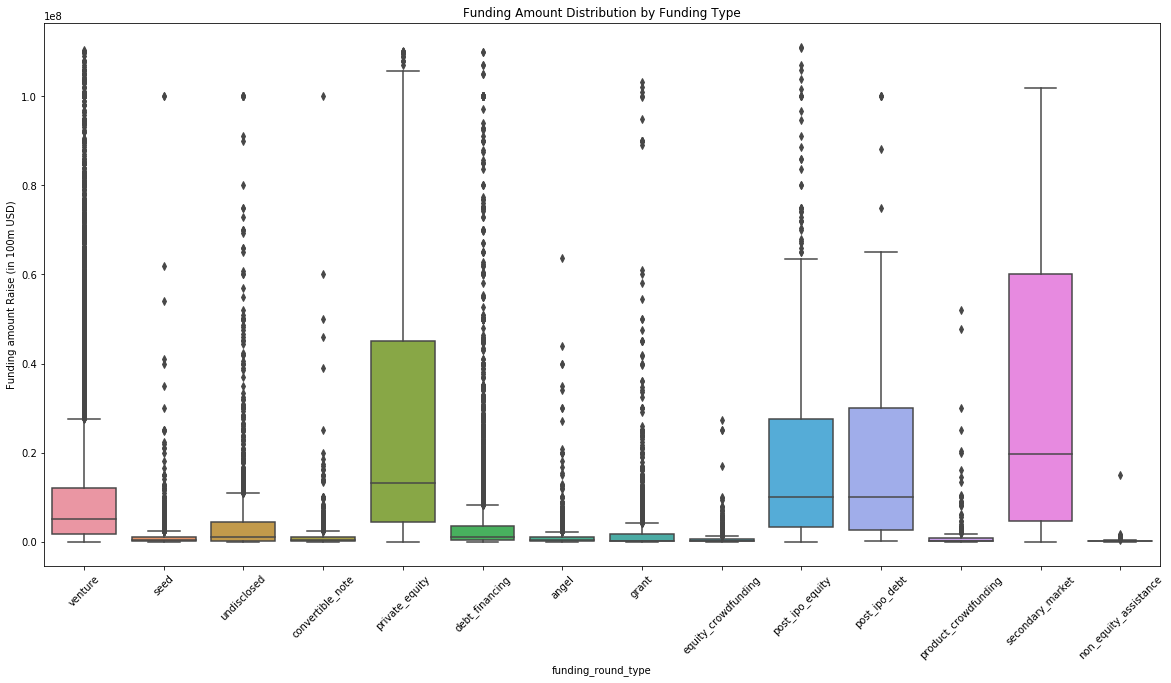

In [24]:
#checking distribution of funding amount variable
#master_frame[['raised_amount_usd']].describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.90, 0.95,0.97,0.98, 0.99])
plt.figure(figsize=(20,10))
sns.boxplot(data=master_frame_cleaned, x='funding_round_type', y='raised_amount_usd')
plt.xticks(rotation=45)
plt.title('Funding Amount Distribution by Funding Type')
plt.ylabel('Funding amount Raise (in 100m USD)')
plt.show()

# Findings of funding type reveal following (Cleaned dataset)
> 1. **Looking at the cleaned dataset it appears venture type funding appears to be best suited the requirement out of four funding types(venute, private equity, seed and angel)**
> 2. **Outlier Removal**
>>    1.*Univariable analysis funding amount variable shown that value exponentially increased from 99th to 100th percentile*
>>    2. *Moreover We could not display the boxplot properly without removing the outliers*

# Creating separate dataset with venture funding since it suited best for Spark fund requirement

In [25]:
master_frame_venture = master_frame_select.loc[master_frame['funding_round_type']=='venture',:].reset_index(drop=True)
master_frame_venture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50228 entries, 0 to 50227
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        50228 non-null  object 
 1   funding_round_permalink  50228 non-null  object 
 2   funding_round_type       50228 non-null  object 
 3   funding_round_code       28043 non-null  object 
 4   funded_at                50228 non-null  object 
 5   raised_amount_usd        50228 non-null  float64
 6   permalink                50228 non-null  object 
 7   name                     50228 non-null  object 
 8   homepage_url             47620 non-null  object 
 9   category_list            49726 non-null  object 
 10  status                   50228 non-null  object 
 11  country_code             48111 non-null  object 
 12  state_code               47367 non-null  object 
 13  region                   47515 non-null  object 
 14  city                  

# Analyzing observation with missing country values
> 1. *Country has 2117 missing value in the dataset*
> 2. *Analyse the observation to check whether we can impute missing value*
> 3. *If no possibility of missing value is available then we add missing as value so that we can analyse them separately*

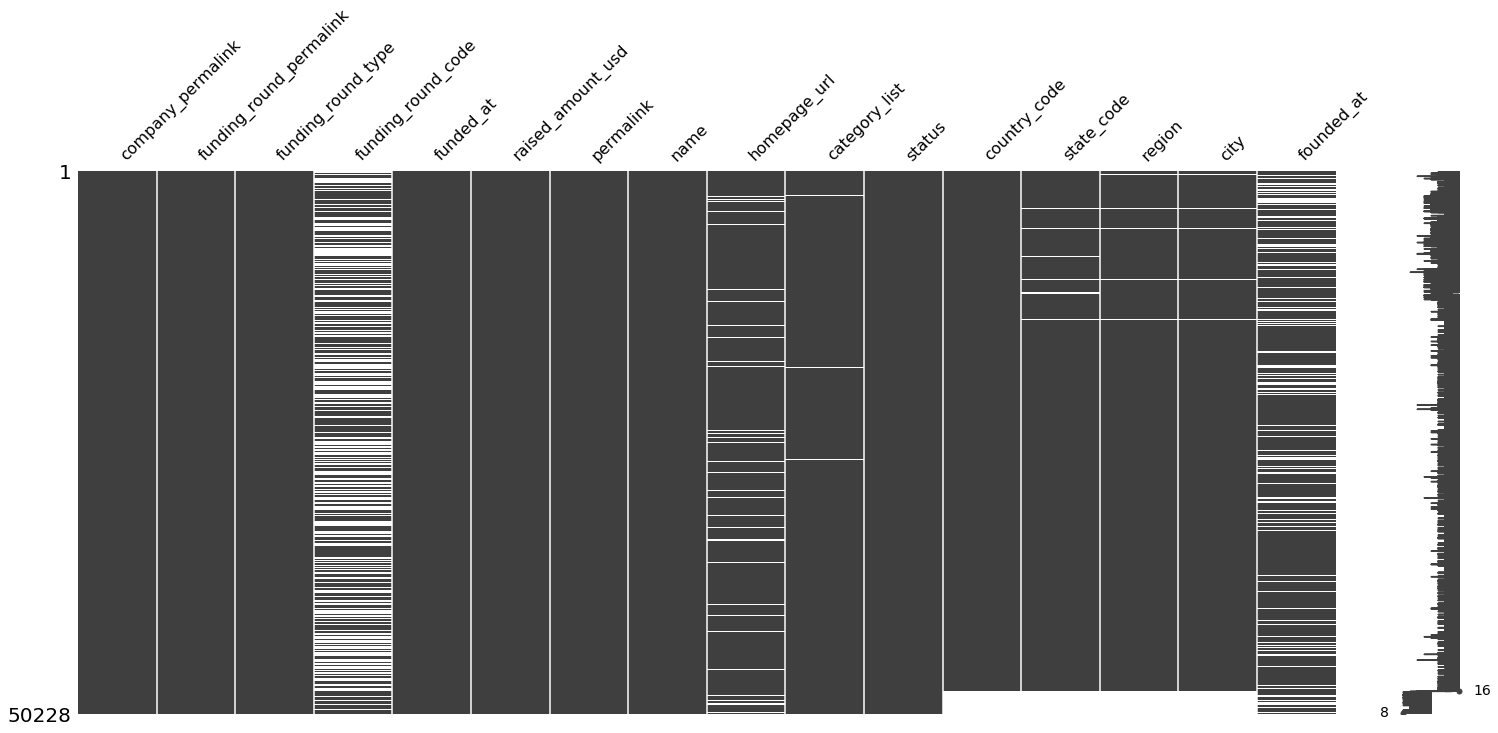

In [26]:
%matplotlib inline
#learned about this package during my certification from Datacamp
msno.matrix(master_frame_venture.sort_values('country_code'))

### **Above graph clearly shows that Missing value imputation is not possible on the basis of city or state_code**

### **After carefully analyzing the further steps decision taken to remove observations with missing country details**



In [27]:
master_frame_venture.country_code.dropna(inplace=True)
master_frame_venture.reset_index(drop=True, inplace=True)

In [28]:
master_frame_venture['country_code'].value_counts()

USA    36139
GBR     2055
CHN     1564
CAN     1256
FRA      917
       ...  
GGY        1
BAH        1
KNA        1
KWT        1
UGA        1
Name: country_code, Length: 97, dtype: int64

### **Loading List of country code for english speaking countries compiled from link provided(wikipedia)**
> *https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language*

In [29]:
english_country = pd.read_csv("D:/Upgrad/2. Exploratory Data Analysis/Module_3_Investment Assignment/English_Countries.csv")
english_country.head()

,Country_cd
0,AUS
1,NZL
2,GBR
3,USA
4,ATG


In [30]:
#creating a list of all english speaking country code
english_cntry_cd = list(english_country.Country_cd)

## **Filtering dataset for countries where English is either primary or official language**

In [31]:
master_frame_venture_eng = master_frame_venture.loc[master_frame_venture['country_code'].isin(english_cntry_cd)]
master_frame_venture_eng.country_code.value_counts()

USA    36139
GBR     2055
CAN     1256
IND      824
ISR      796
IRL      222
SGP      221
AUS      206
NZL       48
MYS       30
ARE       26
ZAF       23
NGA       15
PHL       13
CYP       10
JOR        8
KEN        7
PAK        7
GHA        3
TTO        3
MLT        3
CMR        3
BGD        2
BWA        2
MMR        1
KWT        1
MUS        1
KNA        1
UGA        1
Name: country_code, dtype: int64

In [32]:
#creating new dataset to summarize dataset total funding by each countries
venture_eng_countries = pd.pivot_table(master_frame_venture_eng,index=['country_code'], values='raised_amount_usd', aggfunc=np.sum).sort_values('raised_amount_usd', ascending=False).reset_index()

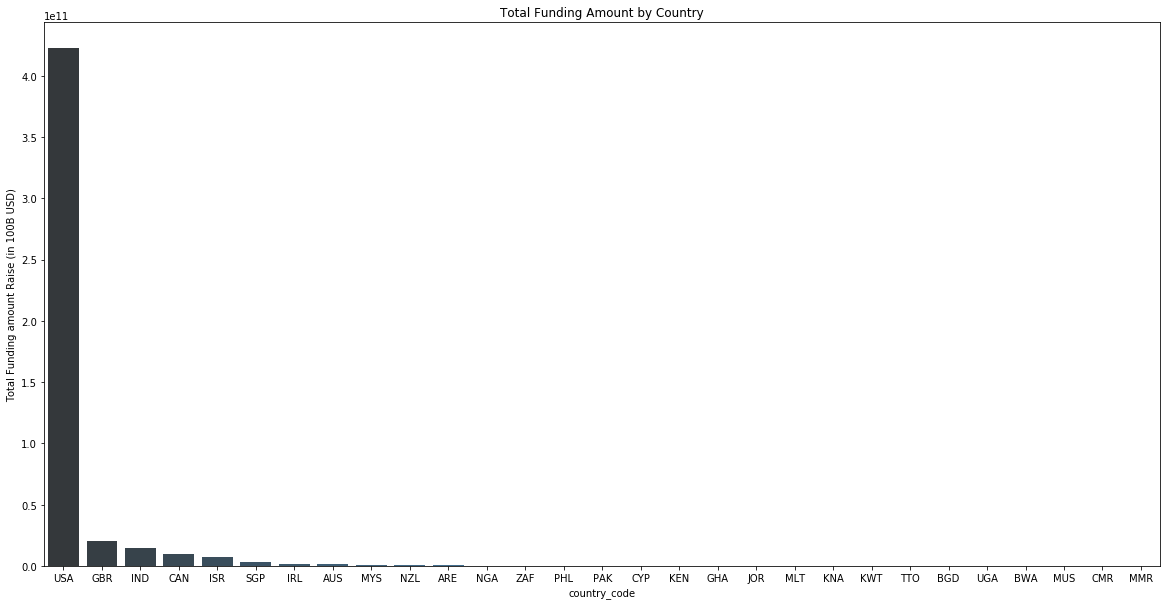

In [60]:
plt.figure(figsize=(20,10))
sns.barplot(data=venture_eng_countries, x='country_code', y='raised_amount_usd',  palette="Blues_d")
plt.title('Total Funding Amount by Country')
plt.ylabel('Total Funding amount Raise (in 100B USD)')
plt.show()

In [61]:
venture_eng_top9= venture_eng_countries.head(9)
venture_eng_top9

,country_code,raised_amount_usd
0,USA,4.225108e+11
1,GBR,2.024563e+10
2,IND,1.439186e+10
3,CAN,9.583332e+09
4,ISR,6.907515e+09
5,SGP,2.793918e+09
6,IRL,1.676131e+09
7,AUS,1.322935e+09
8,MYS,8.830588e+08


## **Nine country which have received most investments are USA, Britan, India, Canada, Isreal, Singapore, Ireland, Australia and Malaysia in same order**

In [62]:
#creating list of top 9 list of countries which receieved highest investment
top9_country = list(venture_eng_top9['country_code'])

In [63]:
#Filtering the dataframe on the basis top 9 countries identified for investment
top9 = master_frame_venture_eng.loc[master_frame_venture_eng['country_code'].isin(top9_country)].reset_index(drop=True)
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
2,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
3,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
4,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [64]:
# Ensuring only top nice countries got picked up in top9 dataset
top9.groupby('country_code')['raised_amount_usd'].agg(['sum', 'count']).sort_values('sum', ascending=False)

,sum,count
country_code,,
USA,4.225108e+11,36139
GBR,2.024563e+10,2055
IND,1.439186e+10,824
CAN,9.583332e+09,1256
ISR,6.907515e+09,796
SGP,2.793918e+09,221
IRL,1.676131e+09,222
AUS,1.322935e+09,206
MYS,8.830588e+08,30


### **Cleaning category_list variable picking first string where multiple strings given separated by '|'**

In [65]:
top9['category_list_clean'] = top9['category_list'].apply(lambda x: str(x).split('|')[0])
top9.category_list_clean.value_counts()

Biotechnology                 6205
Software                      3587
Advertising                   1959
Health Care                   1681
Enterprise Software           1639
                              ... 
Social Media Marketing           1
Online Scheduling                1
Ticketing                        1
Anything Capital Intensive       1
High Tech                        1
Name: category_list_clean, Length: 578, dtype: int64

In [66]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [67]:
# Maniputing mapping dataset so that we can create mapping dataset
category_transform = mapping.set_index('category_list').stack().reset_index()
category_mapping = category_transform.loc[category_transform[0]==1].drop(0, axis=1)
category_mapping.head()

,category_list,level_1
1,NaN,Blanks
14,3D,Manufacturing
23,3D Printing,Manufacturing
32,3D Technology,Manufacturing
44,Accounting,"Social, Finance, Analytics, Advertising"


# **Cleaning category_cleaning dataset**
> 1.*Given variable in both the Datasets needs cleaning (top9 and category_mapping)*
> 2.*There is possibility category_list field not in same case in both datasets*
>> 1. *Planning keep both dataset values in lowercase *
>> 2. *we will be removing more one spaces between the string*
>> 3. *Removing leading and trailing blanks from category_list*

In [68]:
#cleaning category_list in mapping dataset to modify lower case, removing leading and trailing blanks and remove extra spaces
category_mapping['category_list_clean'] = category_mapping['category_list'].apply(lambda x: str(x).lower().strip()).apply(lambda x: re.sub(' +',' ',x))
category_mapping.drop('category_list', axis=1, inplace=True)

In [69]:
# Renaming columns to make it more meaningful
category_mapping.columns=['Sector', 'category_list_clean']
category_mapping.head()

,Sector,category_list_clean
1,Blanks,nan
14,Manufacturing,3d
23,Manufacturing,3d printing
32,Manufacturing,3d technology
44,"Social, Finance, Analytics, Advertising",accounting


In [70]:
#cleaning category_list in top9 dataset to modify lower case, removing leading and trailing blanks and remove extra spaces
top9['category_list_clean'] = top9['category_list_clean'].apply(lambda x: str(x).lower().strip()).apply(lambda x: re.sub(' +',' ',x))

# **Left Joining category mapping dataset  to top9 using category_list_clean**

In [71]:
top9_sectors = pd.merge(top9, category_mapping, how='left', on='category_list_clean')

In [72]:
#checking distribution of sector to check whether unexpected values exists
top9_sectors.Sector.value_counts()

Others                                     9646
Cleantech / Semiconductors                 8948
Social, Finance, Analytics, Advertising    5969
News, Search and Messaging                 4999
Health                                     3611
Manufacturing                              2846
Entertainment                              2109
Automotive & Sports                         616
Blanks                                      237
Name: Sector, dtype: int64

In [73]:
# Checking blank sector values for category_list value to see whether any non blank category categorized as Sector "Blank"
top9_sectors.loc[top9_sectors.Sector == 'Blanks']['category_list_clean'].value_counts()

nan    237
Name: category_list_clean, dtype: int64

## **Creating three different dataset for top 3 countries with only picking obs with funding amount between 5m to 15m USD**

In [74]:
D1 = top9_sectors.loc[(top9_sectors.country_code == 'USA') & (top9_sectors.raised_amount_usd >= 5000000) & (top9_sectors.raised_amount_usd <= 15000000)]
D2 = top9_sectors.loc[(top9_sectors.country_code == 'GBR') & (top9_sectors.raised_amount_usd >= 5000000) & (top9_sectors.raised_amount_usd <= 15000000)]
D3 = top9_sectors.loc[(top9_sectors.country_code == 'IND') & (top9_sectors.raised_amount_usd >= 5000000) & (top9_sectors.raised_amount_usd <= 15000000)]

In [75]:
# Checking number of investment in top countries 
print(D1.country_code.value_counts())
print(D2.country_code.value_counts())
print(D3.country_code.value_counts())

USA    12150
Name: country_code, dtype: int64
GBR    628
Name: country_code, dtype: int64
IND    330
Name: country_code, dtype: int64


In [76]:
# Univariate analysis of funding amount for USA
D1.raised_amount_usd.describe()

count    1.215000e+04
mean     8.932621e+06
std      3.076844e+06
min      5.000000e+06
25%      6.000749e+06
50%      8.300000e+06
75%      1.100000e+07
max      1.500000e+07
Name: raised_amount_usd, dtype: float64

In [77]:
# Univariate analysis of funding amount for GBR
D2.raised_amount_usd.describe()

count    6.280000e+02
mean     8.657394e+06
std      2.870527e+06
min      5.000000e+06
25%      6.076152e+06
50%      8.000000e+06
75%      1.061899e+07
max      1.500000e+07
Name: raised_amount_usd, dtype: float64

In [78]:
# Univariate analysis of funding amount for IND
D3.raised_amount_usd.describe()

count    3.300000e+02
mean     9.019829e+06
std      3.231192e+06
min      5.000000e+06
25%      6.000000e+06
50%      8.775000e+06
75%      1.078750e+07
max      1.500000e+07
Name: raised_amount_usd, dtype: float64

In [79]:
# Checking sum of investment in top countries 
print(D1.raised_amount_usd.sum())
print(D2.raised_amount_usd.sum())
print(D3.raised_amount_usd.sum())

108531347515.0
5436843539.0
2976543602.0


# **Generating summary of sector wise funding amount in top three countries**

In [81]:
# sector wise funding summary for USA
D1_summ = pd.pivot_table(D1, values ='raised_amount_usd', index=['Sector'], aggfunc=['sum', 'count'])
# Changing columns to make it more informational
D1_summ.columns = ['Total_Funding', 'Number_of_Funding']#['Sector','Total_Funding', 'Number_of_Finding']
# Sorting dataset by number and sum of funding amount
D1_summ.sort_values(['Number_of_Funding', 'Total_Funding'], ascending=[False, False], inplace=True)
D1_summ

,Total_Funding,Number_of_Funding
Sector,,
Others,2.608928e+10,2923
Cleantech / Semiconductors,2.118100e+10,2297
"Social, Finance, Analytics, Advertising",1.668070e+10,1912
"News, Search and Messaging",1.379682e+10,1563
Health,8.200859e+09,908
Manufacturing,7.258553e+09,799
Entertainment,5.000213e+09,580
Automotive & Sports,1.454104e+09,167
Blanks,7.647633e+08,86


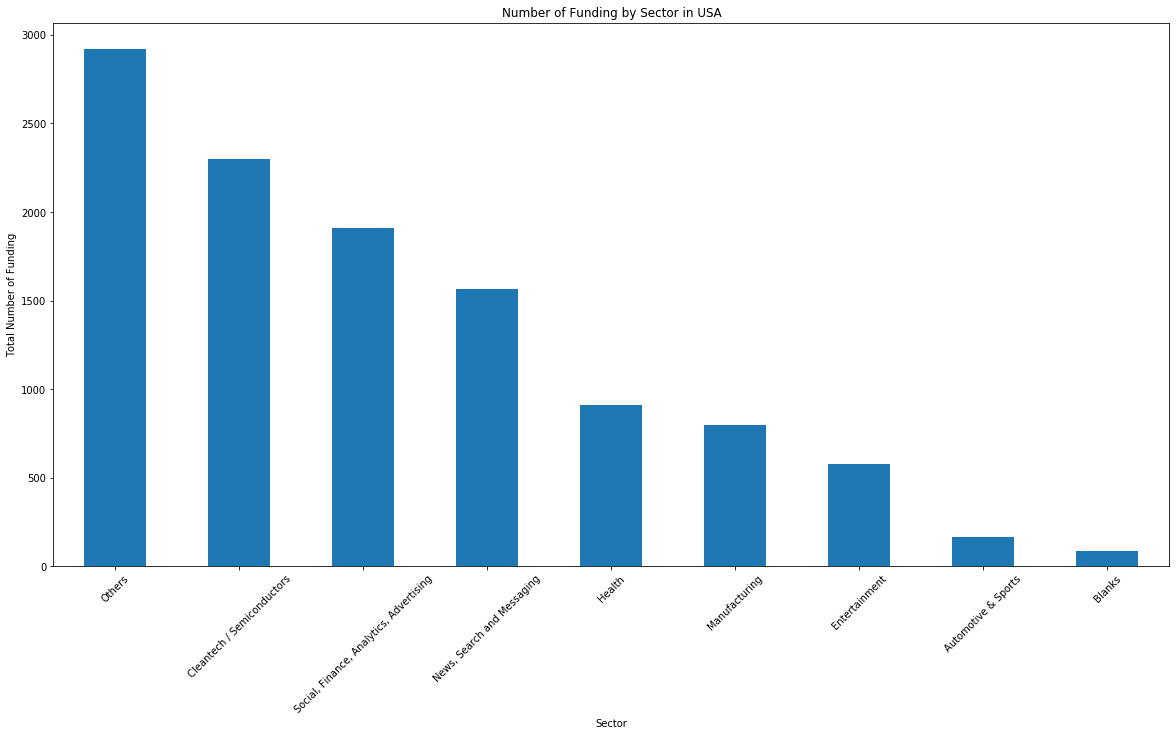

In [82]:
plt.figure(figsize=(20,10))
D1_summ['Number_of_Funding'].plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Number of Funding by Sector in USA')
plt.ylabel('Total Number of Funding')
plt.show()

In [84]:
# sector wise funding summary for GBR
D2_summ = pd.pivot_table(D2, values ='raised_amount_usd', index=['Sector'], aggfunc=['sum', 'count'])
# Changing columns to make it more informational
D2_summ.columns = ['Total_Funding', 'Number_of_Funding']#['Sector','Total_Funding', 'Number_of_Finding']
# Sorting dataset by number and sum of funding amount
D2_summ.sort_values(['Number_of_Funding', 'Total_Funding'], ascending=[False, False], inplace=True)
D2_summ

,Total_Funding,Number_of_Funding
Sector,,
Others,1.249124e+09,143
Cleantech / Semiconductors,1.136905e+09,127
"Social, Finance, Analytics, Advertising",8.218884e+08,98
"News, Search and Messaging",6.157462e+08,73
Entertainment,4.615111e+08,54
Manufacturing,3.619403e+08,42
Health,2.145375e+08,24
Automotive & Sports,1.670516e+08,16
Blanks,5.776485e+07,7


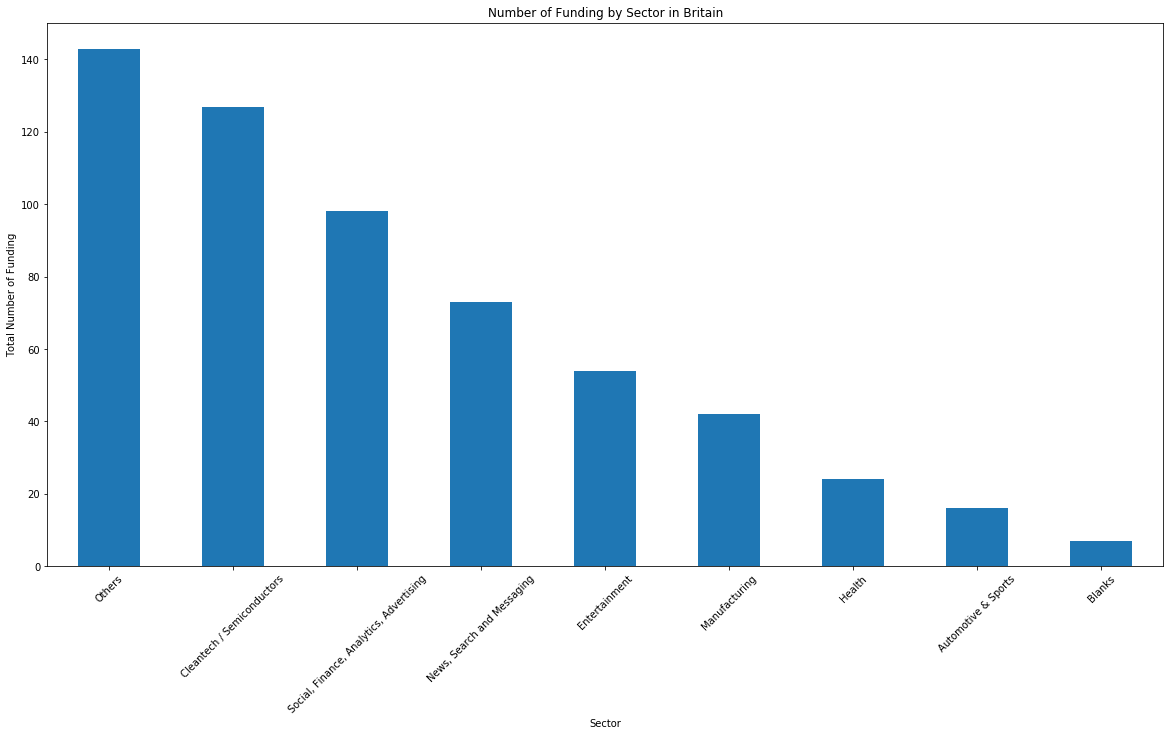

In [85]:
plt.figure(figsize=(20,10))
D2_summ['Number_of_Funding'].plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Number of Funding by Sector in Britain')
plt.ylabel('Total Number of Funding')
plt.show()

In [86]:
# sector wise funding summary for GBR
D3_summ = pd.pivot_table(D3, values ='raised_amount_usd', index=['Sector'], aggfunc=['sum', 'count'])
# Changing columns to make it more informational
D3_summ.columns = ['Total_Funding', 'Number_of_Funding']#['Sector','Total_Funding', 'Number_of_Finding']
# Sorting dataset by number and sum of funding amount
D3_summ.sort_values(['Number_of_Funding', 'Total_Funding'], ascending=[False, False], inplace=True)
D3_summ

,Total_Funding,Number_of_Funding
Sector,,
Others,1.007410e+09,109
"News, Search and Messaging",4.338345e+08,52
Entertainment,2.808300e+08,33
"Social, Finance, Analytics, Advertising",2.905435e+08,32
Manufacturing,2.009000e+08,21
Cleantech / Semiconductors,1.653800e+08,20
Health,1.677400e+08,19
Automotive & Sports,1.369000e+08,13
Blanks,2.700000e+07,2


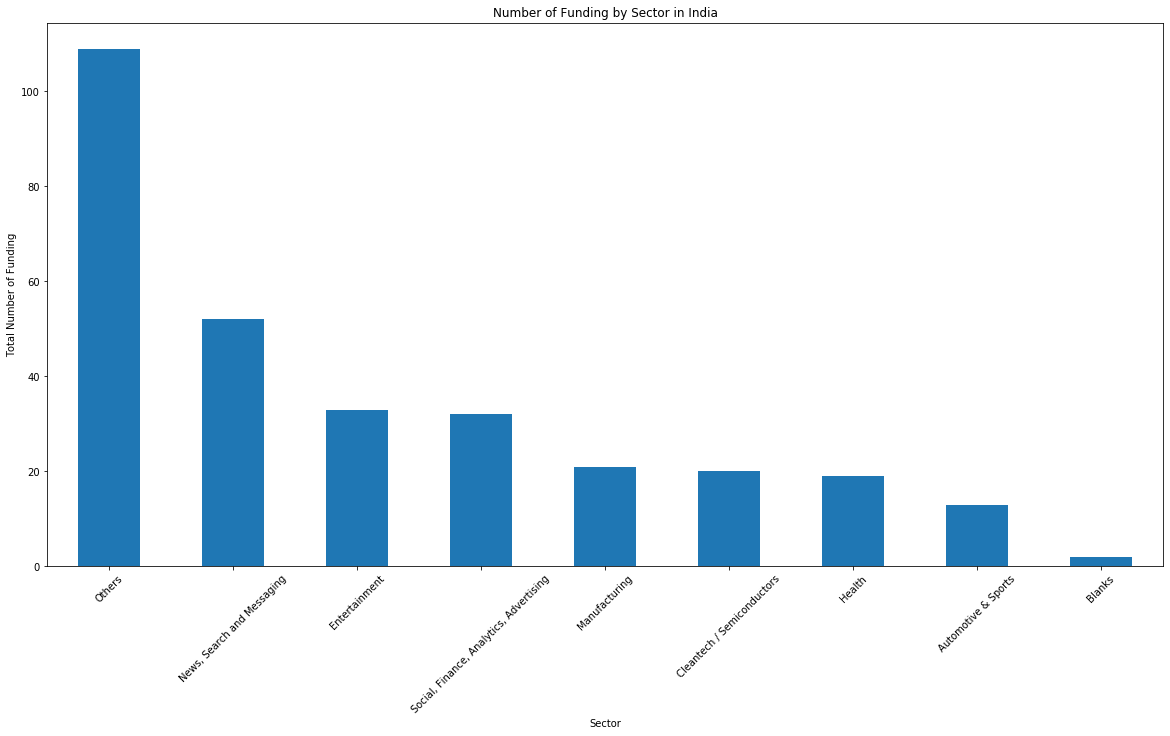

In [87]:
plt.figure(figsize=(20,10))
D3_summ['Number_of_Funding'].plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Number of Funding by Sector in India')
plt.ylabel('Total Number of Funding')
plt.show()

In [88]:
D1_summ['Country']='USA'
D2_summ['Country']='GBR'
D3_summ['Country']='IND'

In [96]:
#Combining all three dataset to generate single chart
D_summ_comb = pd.concat([D1_summ, D2_summ, D3_summ])
D_summ_comb.reset_index(inplace=True)


<Figure size 2160x1440 with 0 Axes>

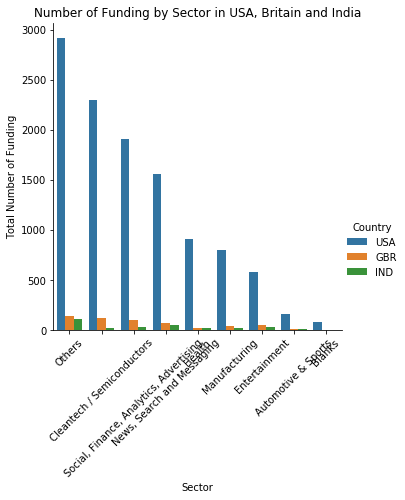

In [99]:
plt.figure(figsize=(30,20))
sns.catplot(data=D_summ_comb, x='Sector', y='Number_of_Funding', hue='Country', kind='bar')
plt.xticks(rotation=45)
plt.title('Number of Funding by Sector in USA, Britain and India')
plt.ylabel('Total Number of Funding')
plt.show()

In [100]:
D_summ_comb.columns

Index(['Sector', 'Total_Funding', 'Number_of_Funding', 'Country'], dtype='object')

## **Information about largest number of funding received in top sectors in all three companies**

In [110]:
D1.loc[D1.Sector=='Others']['name'].value_counts(ascending=False).head(1)

Virtustream    6
Name: name, dtype: int64

In [111]:
D2.loc[D2.Sector=='Others']['name'].value_counts(ascending=False).head(1)

Electric Cloud    4
Name: name, dtype: int64

In [112]:
D3.loc[D3.Sector=='Others']['name'].value_counts(ascending=False).head(1)

Myntra    4
Name: name, dtype: int64

## **Information about largest number of funding received in second best sectors in all three companies**

In [114]:
D1.loc[D1.Sector=='Cleantech / Semiconductors']['name'].value_counts(ascending=False).head(1)

Tigo Energy    8
Name: name, dtype: int64

In [115]:
D2.loc[D2.Sector=='Cleantech / Semiconductors']['name'].value_counts(ascending=False).head(1)

EUSA Pharma    3
Name: name, dtype: int64

In [116]:
D3.loc[D3.Sector=='News, Search and Messaging']['name'].value_counts(ascending=False).head(1)

GupShup    3
Name: name, dtype: int64

# **Further analysis done in order to add insights in Deck**

In [117]:

len(master_frame_venture['country_code'])

50228

In [118]:
master_frame_venture['country_code'].nunique()

97

In [119]:
master_frame_venture_eng['country_code'].nunique()

29

In [124]:
D1.groupby('category_list_clean')['raised_amount_usd'].agg(['sum','count']).sort_values(['sum', 'count'], ascending=[False, False])

,sum,count
category_list_clean,,
biotechnology,1.340634e+10,1477
software,9.125717e+09,1044
enterprise software,5.902249e+09,642
advertising,5.870184e+09,691
analytics,4.597354e+09,517
...,...,...
internet infrastructure,5.000000e+06,1
match-making,5.000000e+06,1
social + mobile + local,5.000000e+06,1


In [125]:
D2.groupby('category_list_clean')['raised_amount_usd'].agg(['sum','count']).sort_values(['sum', 'count'], ascending=[False, False])

,sum,count
category_list_clean,,
biotechnology,636958624.0,70
software,383817324.0,45
advertising,306794581.0,35
clean technology,277078825.0,32
e-commerce,262637742.0,27
...,...,...
architecture,5000000.0,1
digital media,5000000.0,1
film,5000000.0,1


In [126]:
D3.groupby('category_list_clean')['raised_amount_usd'].agg(['sum','count']).sort_values(['sum', 'count'], ascending=[False, False])

,sum,count
category_list_clean,,
e-commerce,343869507.0,37
software,163050000.0,19
mobile,128490000.0,12
finance,126006050.0,15
curated web,110178770.0,15
...,...,...
restaurants,6000000.0,1
startups,6000000.0,1
web design,5400000.0,1
